# Assignment 3 - Poisson Regression and Survival Analysis
SPPH 500 - Ly Trinh

Data were derived from the Veterans’ Administration Lung Cancer study, and is saved in VeteransData.csv. This is a randomized trial of two treatment regimens for lung cancer. Investigators sought to determine the effect of two different treatments on time to death among veteran patients with lung cancer.  The goal is to decide which treatment regimen is better for survival, while adjusting for potential confounders.  The variables collected were:

VARIABLE DESCRIPTIONS 

trt: Standard = 1, test  = 2 \
celltype: Squamous =1, smallcell = 2, adeno = 3, large = 4 \
time: Survival time \
status: Censoring status \
karno: Karnofsky performance score (good = 100) \
diagtime: Months from diagnosis to randomization \
age: In years \
prior: Prior therapy (no = 0, yes = 1) \

In [153]:
# load packages
library(tidyverse) #for plotting and summary statistics
library(survival) # for survival models

In [154]:
# load data
Veterans <- read.csv('./VeteransData.csv')
dim(Veterans)
head(Veterans)

[1] 137   8

trt,celltype,time,status,karno,diagtime,age,prior
1,squamous,72,1,60,7,69,0
1,squamous,411,1,70,5,64,1
1,squamous,228,1,60,3,38,0
1,squamous,126,1,60,9,63,1
1,squamous,118,1,70,11,65,1
1,squamous,10,1,20,5,49,0


In [155]:
summary(Veterans)

      trt             celltype       time           status      
 Min.   :1.000   adeno    :27   Min.   :  1.0   Min.   :0.0000  
 1st Qu.:1.000   large    :27   1st Qu.: 25.0   1st Qu.:1.0000  
 Median :1.000   smallcell:48   Median : 80.0   Median :1.0000  
 Mean   :1.496   squamous :35   Mean   :121.6   Mean   :0.9343  
 3rd Qu.:2.000                  3rd Qu.:144.0   3rd Qu.:1.0000  
 Max.   :2.000                  Max.   :999.0   Max.   :1.0000  
     karno          diagtime           age            prior      
 Min.   :10.00   Min.   : 1.000   Min.   :34.00   Min.   :0.000  
 1st Qu.:40.00   1st Qu.: 3.000   1st Qu.:51.00   1st Qu.:0.000  
 Median :60.00   Median : 5.000   Median :62.00   Median :0.000  
 Mean   :58.57   Mean   : 8.774   Mean   :58.31   Mean   :0.292  
 3rd Qu.:75.00   3rd Qu.:11.000   3rd Qu.:66.00   3rd Qu.:1.000  
 Max.   :99.00   Max.   :87.000   Max.   :81.00   Max.   :1.000  

In [156]:
# convert categorical vars to factors
Veterans <- Veterans %>%
    mutate_at(c("trt", "status", "prior"), as.factor)
summary(Veterans)

 trt         celltype       time       status      karno          diagtime     
 1:69   adeno    :27   Min.   :  1.0   0:  9   Min.   :10.00   Min.   : 1.000  
 2:68   large    :27   1st Qu.: 25.0   1:128   1st Qu.:40.00   1st Qu.: 3.000  
        smallcell:48   Median : 80.0           Median :60.00   Median : 5.000  
        squamous :35   Mean   :121.6           Mean   :58.57   Mean   : 8.774  
                       3rd Qu.:144.0           3rd Qu.:75.00   3rd Qu.:11.000  
                       Max.   :999.0           Max.   :99.00   Max.   :87.000  
      age        prior 
 Min.   :34.00   0:97  
 1st Qu.:51.00   1:40  
 Median :62.00         
 Mean   :58.31         
 3rd Qu.:66.00         
 Max.   :81.00         

In [ ]:
# what's 0 and 1 for status??

#### (a)  KM Model: 

Fit a simple Kaplan-Meier Survival model to compare survival times for treatment 1 and treatment 2.  Do not use any other variables when fitting this ‘crude’ model.  Produce a plot of the fitted survival curves, and comment on any apparent difference in the 2 groups. 

In [161]:
# crude model
km.mod1 <- survfit(Surv(time, status)~trt, data=Veterans, type="kaplan-meier")
# summary(km.mod1) # not run

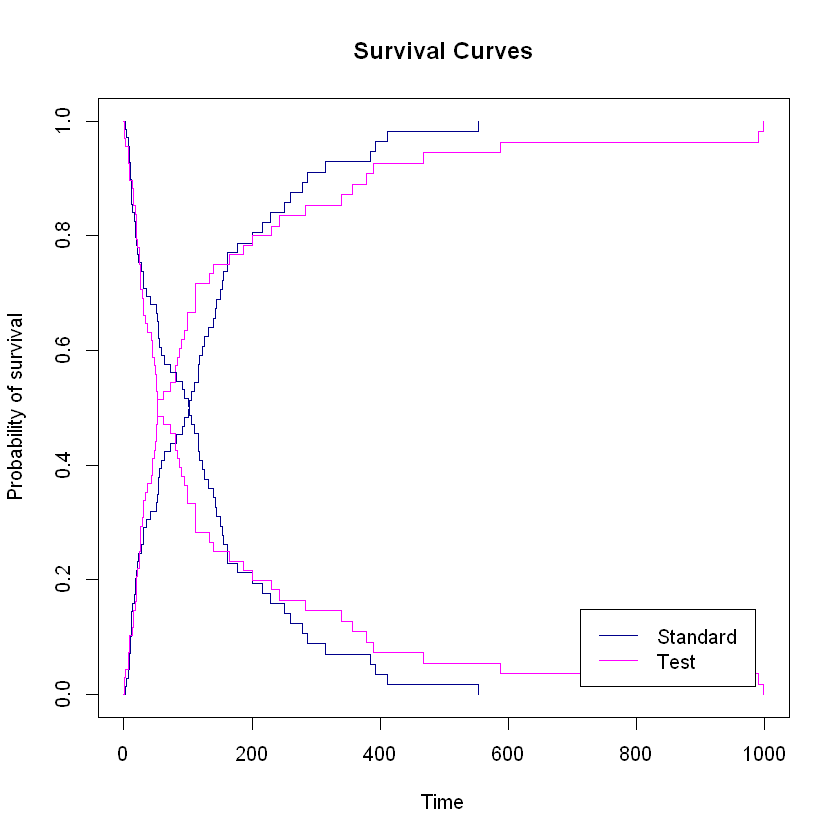

In [163]:
# plot of fitted survival curves
plot(km.mod1, col=c("darkblue", "magenta"),
     main="Survival Curves",
     xlab="Time",
     ylab="Probability of survival")
legend("bottomright",c("Standard","Test"),lty=1, 
       inset=.05, col=c("darkblue","magenta"))